## <center><bold>Quantium Data Analytics Task 2: Experimentation and Uplift Testing</bold></center><br>
<b>Testing the impact of a new store layout for the Chips Category on sales performance </b>

Whats going on?
-> A major retail chain wanted to know: **"If we redesign the chip aisle layout, will we sell more chips?"**

For that they ran a experiment as changing all their stores at once would have been too risky.

##### THE EXPERIMENT<br>
In ** Feb 2019**, the company rolled out a brand new store layout for the chips in three stores:
- Store 77
- Store 86
- Store 88

They let this new layout run for **3 months(Feb through April 2019)** to see what would happen.

##### THE PROBLEM <br>
Lets say Store 77's chip sales went up 20% during those 3 months. 
First thought, **"WOW IT WORKED"**, BUT **"IT MAY NOT BE WHAT IT SEEMS"**

Maybe the sales went up because:
- The season (People preferring chips in the Spring)
- There was a big promotion
- The economy was doing well

**How can we be sure that the rise in sales was because of the layout not because of the other factors?**

##### THE SOLUTION: FINDING "TWIN" STORES
We need to find stores that are like "twins" to our trial stores -stores that:
- Sold similar amounts of chips before the trial
- Had similar customer patterns before the trial
- Were in the similar market conditions
- But **did NOT get the new layout**

These "twin" stores are called **Control Stores**. We can call it a reference store.

This controlled store carry great significance here, as without the control store, any data or analysis of trial store would have not made any sense.

##### What are we going to do?
Right now, we have not the data called merged_df(cleaned, and merged dataset of both **QVI_transaction_data** and **QVI_purchase_behaviour_data**)
Now the process we are going to follow: 
1. Identify which stores have data from July 2018 to June 2019 (Full observation period)
2. Seperate the pre trial period and trial period.
3. Use pretrial period to find the twin stores for the trial stores (77,86,& 88)
4. Once we find the twin stores, we'll compare the trial period of trial stores and control stores.
5. Then only, we will conclude whether the new layout was effective or not.


##### BOTTOM LINE:
We're trying to answer: **"Did the new layout work,or would sales have gone up anyway?"**
Control stores helps to answer that with confidence.


In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [6]:
store_df=pd.read_csv('merged_data.csv')

In [7]:
store_df.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE_VALUES(GRAM),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER,PRICE_PER_PACKET
0,2019-06-06,34,34057,31150,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,RETIREES,Budget,5.4
1,2019-03-04,245,245223,247682,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,RETIREES,Budget,5.4
2,2019-06-25,160,160226,161580,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,OLDER SINGLES/COUPLES,Budget,5.4
3,2019-04-10,65,65122,62177,102,Kettle Mozzarella Basil & Pesto,1,5.4,175,Kettle,OLDER FAMILIES,Budget,5.4
4,2018-09-22,91,91070,89505,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4


---

Client have selected store 77,86, and 88 as trial stores and want control stores that are operational for the entire observation period.

In [8]:
store_df[store_df['STORE_NBR'].isin([77,86,88])].head(4)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE_VALUES(GRAM),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER,PRICE_PER_PACKET
94,2018-12-23,88,88340,87908,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,YOUNG FAMILIES,Premium,5.4
116,2019-03-21,88,88092,86672,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,YOUNG FAMILIES,Premium,5.4
132,2019-03-17,86,86006,84180,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4
201,2018-12-26,88,88187,87149,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4


Trial Period- Feb 2019- End of April 2019

We would want to match trial stores(77,86,88) to the control stores (the stores that are similar to the trial stores prior to the trial period of Feb 2019)

KPI of this comparisions:
- Monthly overall sales revenue
- Monthly number of customers
- Monthly number of transactions per customers.

In [9]:
store_df['DATE']=pd.to_datetime(store_df['DATE'])
store_df['Month_ID']=store_df['DATE'].dt.year*100+store_df['DATE'].dt.month

In [10]:

store_df.head(4)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE_VALUES(GRAM),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER,PRICE_PER_PACKET,Month_ID
0,2019-06-06,34,34057,31150,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,RETIREES,Budget,5.4,201906
1,2019-03-04,245,245223,247682,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,RETIREES,Budget,5.4,201903
2,2019-06-25,160,160226,161580,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,OLDER SINGLES/COUPLES,Budget,5.4,201906
3,2019-04-10,65,65122,62177,102,Kettle Mozzarella Basil & Pesto,1,5.4,175,Kettle,OLDER FAMILIES,Budget,5.4,201904


---

<center> Metrics for comparison of control stores and trial stores </center>

For each store and each month we need to calculate total sales, number of customers, 
transactions per customers, chips per customer and the average price per customers.

In [11]:
monthly_metrics=store_df.groupby(['STORE_NBR','Month_ID']).agg(
    {
    'TOT_SALES':'sum', # total sales
    'LYLTY_CARD_NBR':'nunique', #number of customers
    'TXN_ID':'count', # Total numner of transaction
    'PROD_QTY':'sum' # Total chips/product sold

    }). reset_index()
monthly_metrics.columns=['STORE_NBR','MONTH_ID','TOTAL_SALES','NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS',''
'TOTAL_CHIPS']
monthly_metrics.head(4)

,STORE_NBR,MONTH_ID,TOTAL_SALES,NUMBER_CUSTOMERS,TOTAL_TRANSACTIONS,TOTAL_CHIPS
0,1,201807,188.9,47,49,58
1,1,201808,168.4,41,41,52
2,1,201809,268.1,57,59,71
3,1,201810,175.4,39,40,51


In [12]:
# Derive metrics
monthly_metrics['TXN_PER_CUSTOMERS']=(monthly_metrics['TOTAL_TRANSACTIONS']/monthly_metrics['NUMBER_CUSTOMERS'])
monthly_metrics['CHIPS_PER_CUSTOMER']=(monthly_metrics['TOTAL_CHIPS']/monthly_metrics['NUMBER_CUSTOMERS'])
monthly_metrics['AVG_PRICE_PER_CUSTOMER']=(monthly_metrics['TOTAL_SALES']/monthly_metrics['NUMBER_CUSTOMERS'])

In [13]:
monthly_metrics.head()

,STORE_NBR,MONTH_ID,TOTAL_SALES,NUMBER_CUSTOMERS,TOTAL_TRANSACTIONS,TOTAL_CHIPS,TXN_PER_CUSTOMERS,CHIPS_PER_CUSTOMER,AVG_PRICE_PER_CUSTOMER
0,1,201807,188.9,47,49,58,1.042553,1.234043,4.019149
1,1,201808,168.4,41,41,52,1.000000,1.268293,4.107317
2,1,201809,268.1,57,59,71,1.035088,1.245614,4.703509
3,1,201810,175.4,39,40,51,1.025641,1.307692,4.497436
4,1,201811,184.8,44,45,55,1.022727,1.250000,4.200000


The pre trial period is upto Feb 2019 and the full is from july 2018 to June 2019

First lets figure out the stores that were operational in the entire periods.

In [14]:
all_month=monthly_metrics['MONTH_ID'].nunique()
all_month

12

In [15]:
store_months_counts=monthly_metrics.groupby("STORE_NBR")['MONTH_ID'].nunique()
operational_stores=store_months_counts[store_months_counts==12].index.tolist()

In [16]:
monthly_metrics['STORE_NBR'].nunique()

271

In [17]:
len(operational_stores)

259

Out of 271 stores, only 259 were operationally active through out the entire period.

In [18]:
operational_stores_monthly_metrics=monthly_metrics[monthly_metrics['STORE_NBR'].isin(operational_stores)].copy()

In [19]:
monthly_metrics.size

28485

In [20]:
operational_stores_monthly_metrics.size

27972

Around 513 row of data was removed.

---

 <center>Seperating Pre- Trial data (Data before February 2019) <br>
and Trial data (Data from Febraury 2019- April 2019)</center>

In [21]:
pre_trial_data=operational_stores_monthly_metrics[operational_stores_monthly_metrics['MONTH_ID']<201902]
pre_trial_data.tail()

,STORE_NBR,MONTH_ID,TOTAL_SALES,NUMBER_CUSTOMERS,TOTAL_TRANSACTIONS,TOTAL_CHIPS,TXN_PER_CUSTOMERS,CHIPS_PER_CUSTOMER,AVG_PRICE_PER_CUSTOMER
3155,272,201809,294.5,31,35,69,1.129032,2.225806,9.500000
3156,272,201810,405.1,41,48,94,1.170732,2.292683,9.880488
3157,272,201811,355.8,39,43,83,1.102564,2.128205,9.123077
3158,272,201812,363.1,43,43,81,1.000000,1.883721,8.444186
3159,272,201901,392.4,44,47,90,1.068182,2.045455,8.918182


In [22]:
trial_data=operational_stores_monthly_metrics[(operational_stores_monthly_metrics['MONTH_ID']>=201902) & (operational_stores_monthly_metrics['MONTH_ID']<201905) ]
trial_data.tail()

,STORE_NBR,MONTH_ID,TOTAL_SALES,NUMBER_CUSTOMERS,TOTAL_TRANSACTIONS,TOTAL_CHIPS,TXN_PER_CUSTOMERS,CHIPS_PER_CUSTOMER,AVG_PRICE_PER_CUSTOMER
3149,271,201903,699.6,76,96,192,1.263158,2.526316,9.205263
3150,271,201904,700.8,79,97,194,1.227848,2.455696,8.870886
3160,272,201902,385.3,44,47,89,1.068182,2.022727,8.756818
3161,272,201903,421.9,48,51,97,1.062500,2.020833,8.789583
3162,272,201904,445.1,54,56,105,1.037037,1.944444,8.242593


Note: Trial data is the data of the stores on the trial period. It is where we are trying a new store layout and this data is where we are doing monthly_metrics of the analysis.
The pretrial_store is the store we are using to just check and validate our results.

---

##### <center> Seperating trial and potential control stores </center>

Trial Stores 76,86,88, Now we have to figure out the control stores.
The way of figuring out the control store is to calculate how correlated the performance of each store is to the trial store.

In [23]:
trial_stores_trial_data=trial_data[trial_data['STORE_NBR'].isin([77,86,88])]
trial_stores_trial_data.head()

,STORE_NBR,MONTH_ID,TOTAL_SALES,NUMBER_CUSTOMERS,TOTAL_TRANSACTIONS,TOTAL_CHIPS,TXN_PER_CUSTOMERS,CHIPS_PER_CUSTOMER,AVG_PRICE_PER_CUSTOMER
887,77,201902,211.6,40,40,67,1.000000,1.675000,5.290000
888,77,201903,255.1,46,51,76,1.108696,1.652174,5.545652
889,77,201904,258.1,47,47,76,1.000000,1.617021,5.491489
984,86,201902,872.8,105,131,261,1.247619,2.485714,8.312381
985,86,201903,945.4,108,128,256,1.185185,2.370370,8.753704


In [24]:
trial_stores_pretrial_data=pre_trial_data[pre_trial_data['STORE_NBR'].isin([77,86,88])]
trial_stores_pretrial_data.head()

,STORE_NBR,MONTH_ID,TOTAL_SALES,NUMBER_CUSTOMERS,TOTAL_TRANSACTIONS,TOTAL_CHIPS,TXN_PER_CUSTOMERS,CHIPS_PER_CUSTOMER,AVG_PRICE_PER_CUSTOMER
880,77,201807,268.4,47,51,77,1.085106,1.638298,5.710638
881,77,201808,247.5,46,46,71,1.000000,1.543478,5.380435
882,77,201809,216.8,40,42,66,1.050000,1.650000,5.420000
883,77,201810,194.3,36,37,50,1.027778,1.388889,5.397222
884,77,201811,224.9,39,42,63,1.076923,1.615385,5.766667


In [25]:
Potential_control_stores=pre_trial_data[~pre_trial_data['STORE_NBR'].isin([77,86,88])].copy()

In [26]:
Potential_control_stores

,STORE_NBR,MONTH_ID,TOTAL_SALES,NUMBER_CUSTOMERS,TOTAL_TRANSACTIONS,TOTAL_CHIPS,TXN_PER_CUSTOMERS,CHIPS_PER_CUSTOMER,AVG_PRICE_PER_CUSTOMER
0,1,201807,188.9,47,49,58,1.042553,1.234043,4.019149
1,1,201808,168.4,41,41,52,1.000000,1.268293,4.107317
2,1,201809,268.1,57,59,71,1.035088,1.245614,4.703509
3,1,201810,175.4,39,40,51,1.025641,1.307692,4.497436
4,1,201811,184.8,44,45,55,1.022727,1.250000,4.200000
...,...,...,...,...,...,...,...,...,...
3155,272,201809,294.5,31,35,69,1.129032,2.225806,9.500000
3156,272,201810,405.1,41,48,94,1.170732,2.292683,9.880488
3157,272,201811,355.8,39,43,83,1.102564,2.128205,9.123077
3158,272,201812,363.1,43,43,81,1.000000,1.883721,8.444186


---

##### <center> Finding the twin (control store) </center>

Metrics: Transactions per customers [TXN_PER_CUSTOMERS] <br>
        Monthly overall sales revnue[TOTAL_SALES]<br>
        Monthly_overall_customers[NUMBER_CUSTOMERS]

#### Correlation

In [81]:
def find_control_stores(trial_stores_pretrial_data,potential_control_stores,visualize=True):
    """
    Find the best control stores for each trial store based on correlation across multiple metrics.

    Parameters:
    trial_stores_pretrial_data: Dataframe
    Pre_trial data for trial stores(77,86,88)

    potential_control_stores: DataFrame
    Pre_trial data for all non_trial stores

    visualize=True
    It calls the visualize_correlation function

    Returns:
    DataFrame with control store recommendation for each trial_stores
    """
    trial_stores=[77,86,88]
    metrics=['TOTAL_SALES','NUMBER_CUSTOMERS','TXN_PER_CUSTOMERS']

    potential_control_stores_list=potential_control_stores['STORE_NBR'].unique()

    #store all results
    all_results=[]

    for trial_store in trial_stores:
        print(f"\n{'='*70}")
        print(f"Finding control stores for trial store {trial_store}")
        print(f"\n{'='*70}")

        trial_data=trial_stores_pretrial_data[
            trial_stores_pretrial_data['STORE_NBR']==trial_store].sort_values('MONTH_ID').reset_index(drop=True)
        
        #store correlations for each control stores
        store_correlations={}

        for control_store in potential_control_stores_list:
            #Getting the control store data
            control_data=potential_control_stores[
                potential_control_stores['STORE_NBR']==control_store
            ].sort_values('MONTH_ID').reset_index(drop=True)

            #store correlation for each metrics:
            correlations={}
            

            for metric in metrics:
                #MERGE on Month_ID
                trial_metric=trial_data[['MONTH_ID',metric]].rename(columns={metric:'trial'})
                control_metric=control_data[['MONTH_ID',metric]].rename(columns={metric:'control'})
                merged=trial_metric.merge(control_metric, on='MONTH_ID')
              
                #calculate correlation
                if len(merged)>=2:
                    if merged['trial'].std()>0 and merged['control'].std() >0:
                        corr=merged['trial'].corr(merged['control'])
                        correlations[metric]=corr
                    else:
                        correlations[metric]=None
                
            #Calculate the average correlation of all metrics

            valid_corrs=[va for va in correlations.values() if va is not None]
            if valid_corrs:
                avg_corr=sum(valid_corrs)/len(valid_corrs)
                store_correlations[control_store]={
                    'corr_sales':correlations['TOTAL_SALES'],
                    'corr_customers':correlations['NUMBER_CUSTOMERS'],
                    'corr_txn':correlations['TXN_PER_CUSTOMERS'],
                    'avg_correlation':avg_corr
                }
        #convert to Dataframe
        corr_df=pd.DataFrame.from_dict(store_correlations,orient='index')
        corr_df['CONTROL_STORE']=corr_df.index
        corr_df=corr_df.reset_index(drop=True)

        corr_df=corr_df.sort_values('avg_correlation',ascending=False)

        corr_df['TRIAL_STORE']=trial_store
        
        #Reorder columns
        corr_df=corr_df[['TRIAL_STORE','CONTROL_STORE','corr_sales','corr_customers','corr_txn','avg_correlation']]

        print(f"\nTop 3  control store candidates:")
        print(corr_df.head(3).to_string(index=False))

        

        #STORE RESULTS
        all_results.append(corr_df)
    
    final_results=pd.concat(all_results,ignore_index=True)

    if visualize:
        visualize_correlations(final_results)

    return final_results



        






In [82]:
def visualize_correlations(final_results):
    """
    It is an internal function to create correlation visualization for top control stores
    Parameter:
    final_results: DataFrame
    """
    trial_stores=final_results['TRIAL_STORE'].unique()
    fig,axes=plt.subplots(len(trial_stores),1,figsize=(10,5*len(trial_stores)))

    for idx,trial_store in enumerate(trial_stores):
        # Filter data for this trial store
        trial_data=final_results[final_results['TRIAL_STORE']==trial_store].copy()

        #Get top stores
        top_stores=trial_data.nlargest(3,'avg_correlation')

        # Prepare the data for heatmap
        heatmap_data=top_stores[['corr_sales','corr_customers','corr_txn']].T
        heatmap_data.columns=[f"Store {int(x)}" for x in top_stores['CONTROL_STORE']]
        heatmap_data.index=['Sales','Customers','Txn/Customer']

        #empty row with Nan values that will be masked
        spacer_row=pd.DataFrame([[np.nan]*len(heatmap_data.columns)],
                                columns=heatmap_data.columns,
                                index=[''])

        #add average correlations as a row
        avg_row=pd.DataFrame([top_stores['avg_correlation'].values],
                            columns=heatmap_data.columns,
                            index=['Avg Correlation'])
        
        heatmap_data=pd.concat([heatmap_data,spacer_row,avg_row])

        #create mask for the spacer row only
        mask= pd.DataFrame(False,index=heatmap_data.index,columns=heatmap_data.columns)
        mask.loc['']= True

        #Ensure no Nan or None values
        heatmap_data=heatmap_data.fillna(0)

        # create heatmap
        ax=axes[idx]
        sns.heatmap(heatmap_data,annot=True, cmap='RdYlGn', vmin=-1, vmax=1, center=0,
                    cbar_kws={'label':'Correlation Coefficient' }, ax=ax, linewidths=1,
                    linecolor='white',mask=mask)
        
       
        # Add a horizontal line to seperate average from individual store
        ax.hlines([3],*ax.get_xlim(),colors='black',linewidth=3)
        ax.set_title(f'Trial store:{trial_store}-- Top 3 Control Stores by Correlation', fontsize=13, pad=15)
        ax.set_ylabel('Metrics', fontsize=11)
        ax.set_xlabel('Control Store Number', fontsize=11)
      
    plt.tight_layout()
    plt.show()

        
    

    


Finding control stores for trial store 77


Top 3  control store candidates:
 TRIAL_STORE  CONTROL_STORE  corr_sales  corr_customers  corr_txn  avg_correlation
          77            119    0.775571        0.919064  0.571447         0.755361
          77             84    0.666157        0.851521  0.543934         0.687204
          77            162    0.857584        0.811532  0.345759         0.671625

Finding control stores for trial store 86


Top 3  control store candidates:
 TRIAL_STORE  CONTROL_STORE  corr_sales  corr_customers  corr_txn  avg_correlation
          86            176    0.582468        0.756402  0.794317         0.711063
          86            138    0.796065        0.621938  0.686385         0.701463
          86            260    0.827631        0.745916  0.512777         0.695442

Finding control stores for trial store 88


Top 3  control store candidates:
 TRIAL_STORE  CONTROL_STORE  corr_sales  corr_customers  corr_txn  avg_correlation
          88       

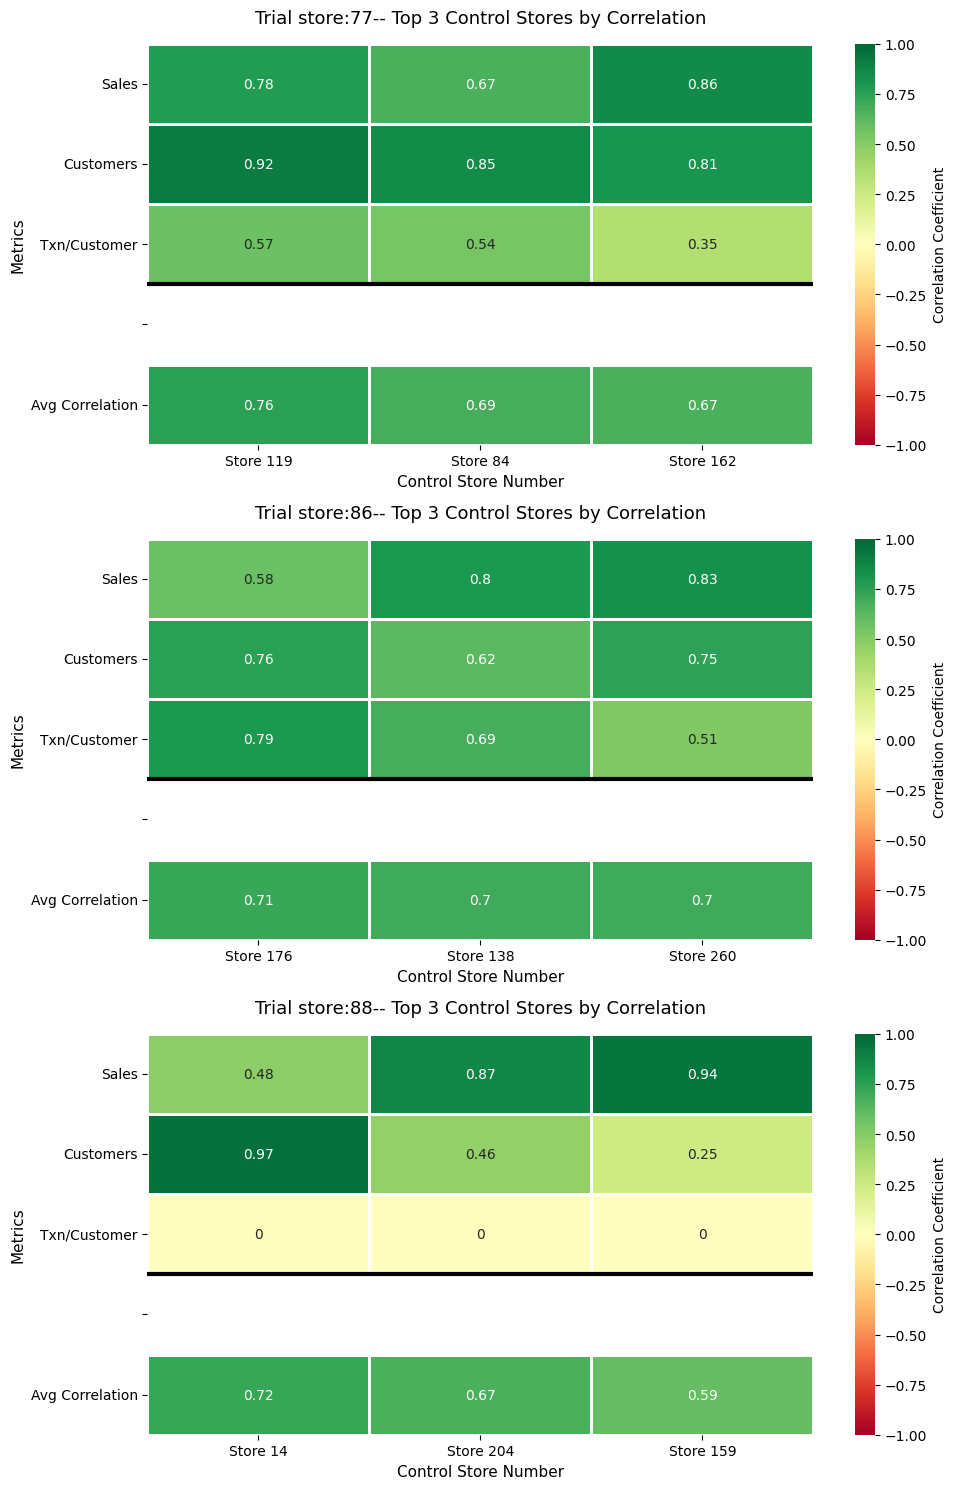

,TRIAL_STORE,CONTROL_STORE,corr_sales,corr_customers,corr_txn,avg_correlation
0,77,119,0.775571,0.919064,0.571447,0.755361
1,77,84,0.666157,0.851521,0.543934,0.687204
2,77,162,0.857584,0.811532,0.345759,0.671625
3,77,3,0.660447,0.755249,0.424751,0.613482
4,77,233,0.973643,0.965682,-0.162093,0.592411
...,...,...,...,...,...,...
763,88,8,-0.634070,-0.377091,-0.484478,-0.498547
764,88,270,-0.695938,-0.074695,-0.892528,-0.554387
765,88,175,-0.831593,-0.368608,-0.476383,-0.558861
766,88,23,-0.891573,-0.157431,-0.732566,-0.593857


In [58]:
results_corr=find_control_stores(trial_stores_pretrial_data,Potential_control_stores)
results_corr

Best Matched control store for each trial store

In [ ]:
best_match=results_corr.groupby('TRIAL_STORE').first().reset_index()
best_match

,TRIAL_STORE,CONTROL_STORE,corr_sales,corr_customers,corr_txn,avg_correlation
0,77,119,0.775571,0.919064,0.571447,0.755361
1,86,176,0.582468,0.756402,0.794317,0.711063
2,88,14,0.479135,0.967364,0.386764,0.723249


In [ ]:
print(best_match[['TRIAL_STORE','CONTROL_STORE','avg_correlation']].to_string(index=False))

 TRIAL_STORE  CONTROL_STORE  avg_correlation
          77            119         0.755361
          86            176         0.711063
          88             14         0.723249


---

#### Absolute Difference

In [ ]:
def calculate_magnitude_difference(trial_stores_pretrial_data,potential_control_stores,visualize=True):
    """
    Finding the best control stores for each trial store based on the normalized differences across multiple metrics.
    Flow:
    Find the value difference between different values of the metrics between the trial 
    and controlled stored, then normalize it and then give the value, that have the smallest
    magnitude of the difference

    Parameters:
    trial_stores_pretrial_data: DataFrame
    pre_trial data for trial stores(77,86,88)

    potential_control_stores: DataFrame
    pre_trial data for all non_trial stores

    Returns: DataFrame
    Control store recommendation for each trial_store based on magnitude differences

    Visualization
    """
    trial_stores=[77,86,88]
    metrics=['TOTAL_SALES','NUMBER_CUSTOMERS','TXN_PER_CUSTOMERS']

    potential_control_stores_list=potential_control_stores['STORE_NBR'].unique()

    #Store allresults
    complete_results=[]

    for trial_store in trial_stores:
        print(f"\n{"="*100}")
        print(f"Finding control stores for each trial store {trial_store} (based on magnitude_differnces)")
        print(f"\n{"="*100}")

        trial_data=trial_stores_pretrial_data[
                    trial_stores_pretrial_data['STORE_NBR']==trial_store].sort_values('MONTH_ID').reset_index(drop=True)
        
        #First Pass: collect all differences for normalizaiton
        all_diffs_by_metric={}
        control_store_raw_diffs={}

        for metric in metrics:
            all_diffs_by_metric[metric]=[]

            #control store
            for control_store in potential_control_stores_list:
                control_data=potential_control_stores[
                            potential_control_stores['STORE_NBR']==control_store
                            ].sort_values('MONTH_ID').reset_index(drop=True)

                #Merge on MONTH_ID
                trial_metric=trial_data[['MONTH_ID',metric]].rename(columns={metric:'trial'})
                control_metric=control_data[['MONTH_ID',metric]].rename(columns={metric:'control'})
                merged=trial_metric.merge(control_metric,on='MONTH_ID')
                
                if len(merged)>0:
                    merged['abs_diff']=abs(merged['trial']-merged['control'])

                    #store for this control store
                    if control_store not in control_store_raw_diffs:
                        control_store_raw_diffs[control_store]={}
                    control_store_raw_diffs[control_store][metric]=merged[['MONTH_ID','abs_diff']].copy()

                    #Collect all the differences for this metric
                    all_diffs_by_metric[metric].extend(merged['abs_diff'].tolist())
                    #extend helps to put all the data in one scale and it adds data as 
                    #individual items not as an entire list of one item

        
        #Second Pass: Normalize and calculate distances
        store_distances={}
        for control_store in potential_control_stores_list:
            if control_store not in control_store_raw_diffs:
                continue

            #store normalized distances for each metric
            distances={}

            for metric in metrics:
                if metric in control_store_raw_diffs[control_store]:
                    store_diffs= control_store_raw_diffs[control_store][metric]

                    # Get min and max for this metric across all stores
                    min_diff=min(all_diffs_by_metric[metric])
                    max_diff=max(all_diffs_by_metric[metric])

                    #Normalize:(value-min)/(max-min)

                    if max_diff > min_diff:
                        store_diffs['normalized']=(store_diffs['abs_diff']-min_diff)/(max_diff-min_diff)
                    else:
                        store_diffs['normalized']=0

                    # Average normalized distance across all months
                    avg_normalized_dist=store_diffs['normalized'].mean()
                    distances[metric]=avg_normalized_dist
                else:
                    distances[metric]=None
            
            valid_dists=[va for va in distances.values() if va is not None]

            if valid_dists:
                avg_dist=sum(valid_dists)/len(valid_dists)
                store_distances[control_store]={
                    'dist_sales':distances['TOTAL_SALES'],
                    'dist_customers':distances['NUMBER_CUSTOMERS'],
                    'dist_txn':distances['TXN_PER_CUSTOMERS'],
                    'avg_magnitude_distance': avg_dist
                }
        
        #Convert to DataFrame
        dist_df=pd.DataFrame.from_dict(store_distances,orient='index')
        dist_df['CONTROL_STORE']=dist_df.index
        dist_df=dist_df.reset_index(drop=True)
        dist_df=dist_df.sort_values('avg_magnitude_distance',ascending=True) # Smaller the distance the better
        dist_df['TRIAL_STORE']=trial_store

        #Reordering the columns
        dist_df=dist_df[['TRIAL_STORE','CONTROL_STORE','dist_sales','dist_customers',
                        'dist_txn','avg_magnitude_distance']]
        
        print(f"\n Top 3 control store candidates (smallest distance):")
        print(dist_df.head(3).to_string(index=False))

        #store results
        complete_results.append(dist_df)
    
    complete_results = pd.concat(complete_results, ignore_index=True)

    if visualize:
        visualize_differences(final_results)

    return complete_results

In [ ]:
def visualize_differences(final_results):
    """
    It is an internal function to create differnces visualization for top control store
    Parameter
    final_results: DataFrame
    """
    

In [80]:
results_diff=calculate_magnitude_difference(trial_stores_pretrial_data,Potential_control_stores)
results_diff



Finding control stores for each trial store 77 (based on magnitude_differnces)


 Top 3 control store candidates (smallest distance):
 TRIAL_STORE  CONTROL_STORE  dist_sales  dist_customers  dist_txn  avg_magnitude_distance
          77            233    0.013298        0.008487  0.093993                0.038593
          77            176    0.033114        0.060820  0.056273                0.050069
          77             46    0.024989        0.039604  0.089402                0.051331

Finding control stores for each trial store 86 (based on magnitude_differnces)


 Top 3 control store candidates (smallest distance):
 TRIAL_STORE  CONTROL_STORE  dist_sales  dist_customers  dist_txn  avg_magnitude_distance
          86             13    0.076060        0.080444  0.060247                0.072250
          86            114    0.058606        0.040222  0.118289                0.072372
          86            101    0.060579        0.058252  0.105009                0.074613

Finding c

,TRIAL_STORE,CONTROL_STORE,dist_sales,dist_customers,dist_txn,avg_magnitude_distance
0,77,233,0.013298,0.008487,0.093993,0.038593
1,77,176,0.033114,0.060820,0.056273,0.050069
2,77,46,0.024989,0.039604,0.089402,0.051331
3,77,145,0.055457,0.042433,0.057358,0.051749
4,77,111,0.034755,0.045262,0.082460,0.054159
...,...,...,...,...,...,...
763,88,146,0.918106,0.951220,0.607083,0.825469
764,88,198,0.919323,0.955865,0.607083,0.827424
765,88,258,0.918159,0.958188,0.607083,0.827810
766,88,99,0.923757,0.953542,0.607083,0.828127
